Template shape: (32768,)


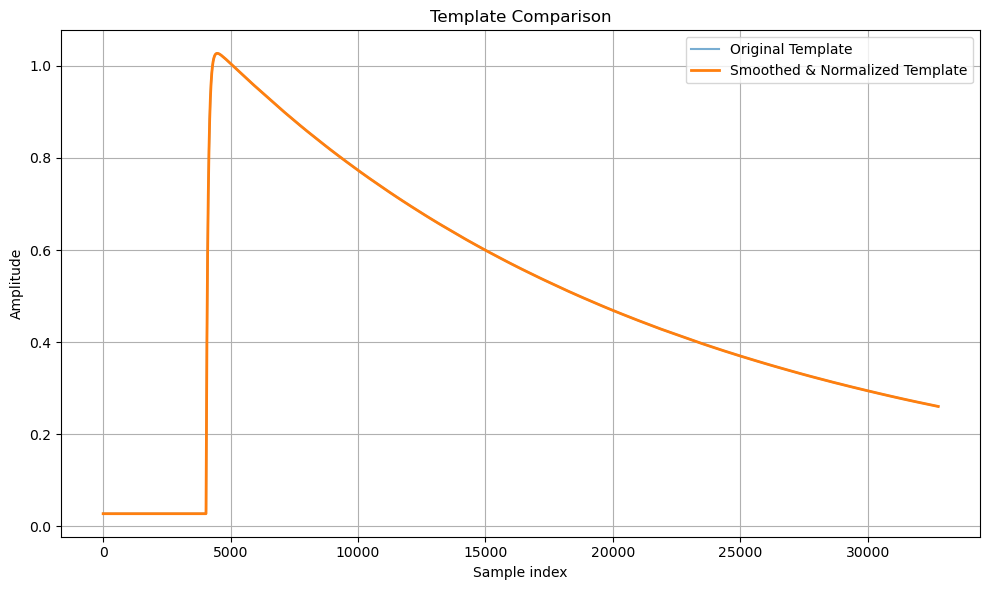

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the .npy template
template = np.load("../templates/template_K_alpha_tight.npy")

# Check shape and basic info
print("Template shape:", template.shape)


# 3. Plot the original and modified template
plt.figure(figsize=(10, 6))
plt.plot(template, label="Original Template", alpha=0.6)
plt.plot(template, label="Smoothed & Normalized Template", linewidth=2)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Template Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the offset as the mean of the first 2048 samples
offset = np.mean(template[:3000])

print("Offset (mean of first 2048 samples):", offset)


Offset (mean of first 2048 samples): 0.027250550244329336


In [3]:
# Check if the template is normalized (max absolute value is 1)
is_normalized = np.isclose(np.max(np.abs(template)), 1.0, atol=1e-6)

print("Is the template normalized?", is_normalized)
print("Maximum absolute value:", np.max(np.abs(template)))


Is the template normalized? False
Maximum absolute value: 1.0272268978964207


In [4]:
print("Range (max - min):", np.max(template) - np.min(template))


Range (max - min): 0.9999994197276253


In [10]:
template_corrected = template - offset
# Subtract offset to shift baseline to zero
template_corrected = template - offset

# Normalize so that the maximum absolute amplitude is 1
template_normalized = template_corrected / np.max(np.abs(template_corrected))



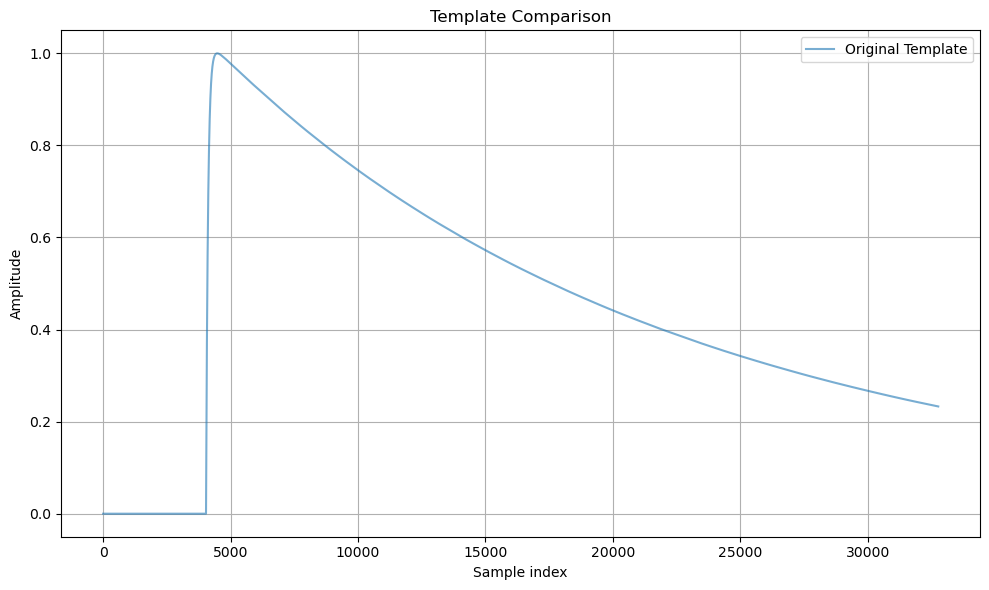

In [11]:
# 3. Plot the original and modified template
plt.figure(figsize=(10, 6))
plt.plot(template_normalized, label="Original Template", alpha=0.6)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Template Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Save the processed template to a new file
np.save("../templates/template_K_alpha_no_baseline.npy", template_normalized)
